In [2]:
from langdetect import detect
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, silhouette_samples

In [26]:
df=pd.read_csv("save_2022-12-01_local.csv")

In [27]:
df.head()

,date,tweet,lang,retweetCount,likeCount,replyCount,username,user_followersCount,user_friendsCount,verifiedStatus,tweet_url,hastags,chr_count,topic
0,2022-04-01,DON'T let the life of this earth delude you.\n...,en,0,1,0,ciira_cyrus,51358,49095,False,https://twitter.com/ciira_cyrus/status/1510024...,['MessageOfResurrection'],288,russia ukrain war
1,2022-04-01,@louvelune @KyivIndependent The communist Sovi...,en,0,0,1,CatManDoo18,964,229,False,https://twitter.com/CatManDoo18/status/1510008...,['RussiaUkrainWar'],309,russia ukrain war
2,2022-04-01,NEW BLOG: US Crises... Domestic Challenges &a...,en,0,0,0,IanRMackintosh,12067,9248,False,https://twitter.com/IanRMackintosh/status/1509...,"['Coronavirus', 'learn', 'pandemic', 'worldwve...",173,russia ukrain war
3,2022-04-01,جایگاه ورزش در دنیا می تونه ترویج گفتمان صلح ب...,fa,0,0,0,neshan_eftekhar,237,347,False,https://twitter.com/neshan_eftekhar/status/150...,"['جام_جهانی2022', 'جنگ_روسیه_اکراین', 'russia_...",226,russia ukrain war
4,2022-04-01,@WeHearPodcast @HarryPotterMAGE How about Ur o...,en,0,0,0,swithtalker,906,4761,False,https://twitter.com/swithtalker/status/1509954...,NaN,281,russia ukrain war


## Data Cleaning

In [28]:
temp=df

In [29]:
temp['tweet']

0        DON'T let the life of this earth delude you.\n...
1        @louvelune @KyivIndependent The communist Sovi...
2        NEW BLOG:  US Crises... Domestic Challenges &a...
3        جایگاه ورزش در دنیا می تونه ترویج گفتمان صلح ب...
4        @WeHearPodcast @HarryPotterMAGE How about Ur o...
                               ...                        
16715    Current Gas prices post-black Friday+Cyber Mon...
16716    @RonnyJacksonTX Do they have a plan for inflat...
16717    @Jason27614314 @KrissyLUnited @TierraHenson @S...
16718    @dbongino Gas prices are down, stock market is...
16719    U.S. gas prices fall to pre–Ukraine invasion l...
Name: tweet, Length: 16720, dtype: object

In [30]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Drop the rows where the tweet is not in English
tweets_df = temp[temp['tweet'].apply(is_english)]

In [124]:
tweets_df

,date,tweet,lang,retweetCount,likeCount,replyCount,username,user_followersCount,user_friendsCount,verifiedStatus,tweet_url,hastags,chr_count,topic
0,2022-04-01,DON'T let the life of this earth delude you.\n...,en,0,1,0,ciira_cyrus,51358,49095,False,https://twitter.com/ciira_cyrus/status/1510024...,['MessageOfResurrection'],288,russia ukrain war
1,2022-04-01,@louvelune @KyivIndependent The communist Sovi...,en,0,0,1,CatManDoo18,964,229,False,https://twitter.com/CatManDoo18/status/1510008...,['RussiaUkrainWar'],309,russia ukrain war
2,2022-04-01,NEW BLOG: US Crises... Domestic Challenges &a...,en,0,0,0,IanRMackintosh,12067,9248,False,https://twitter.com/IanRMackintosh/status/1509...,"['Coronavirus', 'learn', 'pandemic', 'worldwve...",173,russia ukrain war
5,2022-04-01,Day 37 of Ukrain war aginst #Russia :: Europe ...,en,4,3,0,TeesriJungNews,3503,4988,False,https://twitter.com/TeesriJungNews/status/1509...,['Russia'],175,russia ukrain war
8,2022-04-01,NEW BLOG: How CA Culture Sways With WAR &amp;...,en,0,0,0,IanRMackintosh,12067,9248,False,https://twitter.com/IanRMackintosh/status/1509...,"['Coronavirus', 'learn', 'pandemic', 'worldwve...",163,russia ukrain war
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16694,2022-11-30,Looking for the lowest gas prices in town? Vis...,en,0,0,0,stalbertgazette,7535,244,False,https://twitter.com/stalbertgazette/status/159...,"['Gas', 'GasPrices', 'GasStation', 'Gasoline',...",203,gas prices
16698,2022-12-01,US #gasprices plunge as Americans get much-nee...,en,0,0,0,PaulBacon30,541,1278,False,https://twitter.com/PaulBacon30/status/1598466...,['gasprices'],128,gas prices
16710,2022-12-01,Gas prices plunge to lowest level since Februa...,en,0,0,0,ronnee123,1972,4964,False,https://twitter.com/ronnee123/status/159846476...,['SmartNews'],83,gas prices
16713,2022-12-01,The AAA announced Thursday that gas prices in ...,en,0,4,0,KATVNews,175728,622,True,https://twitter.com/KATVNews/status/1598464461...,['arnews'],151,gas prices


In [4]:
tweets_df.to_csv("All_Tweets.csv")

NameError: name 'tweets_df' is not defined

In [112]:
import re
import emoji
import nltk

In [113]:
main_df = pd.read_csv('All_Tweets.csv')

In [114]:
main_df['tweet']

0        DON'T let the life of this earth delude you.\n...
1        @louvelune @KyivIndependent The communist Sovi...
2        NEW BLOG:  US Crises... Domestic Challenges &a...
3        @WeHearPodcast @HarryPotterMAGE How about Ur o...
4        Day 37 of Ukrain war aginst #Russia :: Europe ...
                               ...                        
15801    Current Gas prices post-black Friday+Cyber Mon...
15802    @RonnyJacksonTX Do they have a plan for inflat...
15803    @Jason27614314 @KrissyLUnited @TierraHenson @S...
15804    @dbongino Gas prices are down, stock market is...
15805    U.S. gas prices fall to pre–Ukraine invasion l...
Name: tweet, Length: 15806, dtype: object

In [115]:

# Function to clean a tweet
def clean_tweet(text):
    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove mentions (@)
    text = re.sub(r'@\w+', ' ', text)

    # Remove hashtags (#)
    text = re.sub(r'#|\n', ' ', text)

    # Remove URLs
    text = re.sub(r'(?:@|http?://|https?://|www)\S+', ' ', text)
    
    # Remove dates
    text = re.sub(r'\d{4}-\d{2}-\d{2}', ' ', text)

    # Remove brackets
    text = re.sub(r'[\(\[\{].*?[\)\]\}]', ' ', text)

    # Remove '::'
    text = re.sub(r'::', ' ', text)

    # Remove anything other than text
    text = re.sub(r'[^a-zA-Z\s]+', '', text)

    text = " ".join(text.split())
    
    Mylist=text.split()
    NewList=[]
    for word in Mylist:
        word=word.lower()
        word=word.lstrip()
        #word=word.strip("\n")
        #word=word.strip("\\n")
        word=word.replace(",","")
        word=word.replace(" ","")
        word=word.replace("_","")
        word=re.sub('\+', ' ',word)
        word=re.sub('.*\+\n', '',word)
        word=re.sub('zz+', ' ',word)
        word=word.replace("\t","")
        word=word.replace(".","")
        #word=word.replace("\'s","")
        word=word.strip()
        
        #word.replace("\","")
        if word not in ["", "\\", '"', "'", "*", ":", ";"]:
            if len(word) >= 3:
                if not re.search(r'\d', word): ##remove digits
                    NewList.append(word)
    text=" ".join(NewList)
    
    return text

# Clean the tweets and drop duplicates
main_df = main_df.drop_duplicates()
main_df['tweet'] = main_df['tweet'].apply(clean_tweet)

In [116]:
main_df

,Unnamed: 0,date,tweet,lang,retweetCount,likeCount,replyCount,username,user_followersCount,user_friendsCount,verifiedStatus,tweet_url,hastags,chr_count,topic
0,0,2022-04-01,dont let the life this earth delude you becaus...,en,0,1,0,ciira_cyrus,51358,49095,False,https://twitter.com/ciira_cyrus/status/1510024...,['MessageOfResurrection'],288,russia ukrain war
1,1,2022-04-01,the communist soviet union ended december comm...,en,0,0,1,CatManDoo18,964,229,False,https://twitter.com/CatManDoo18/status/1510008...,['RussiaUkrainWar'],309,russia ukrain war
2,2,2022-04-01,new blog crises domestic challenges amp europe...,en,0,0,0,IanRMackintosh,12067,9248,False,https://twitter.com/IanRMackintosh/status/1509...,"['Coronavirus', 'learn', 'pandemic', 'worldwve...",173,russia ukrain war
3,4,2022-04-01,how about own people doing what brillian idea ...,en,0,0,0,swithtalker,906,4761,False,https://twitter.com/swithtalker/status/1509954...,NaN,281,russia ukrain war
4,5,2022-04-01,day ukrain war aginst russia europe faces gas ...,en,4,3,0,TeesriJungNews,3503,4988,False,https://twitter.com/TeesriJungNews/status/1509...,['Russia'],175,russia ukrain war
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15801,16715,2022-12-01,current gas prices postblack fridaycyber monda...,en,0,1,0,Aru762mmR,703,1368,False,https://twitter.com/Aru762mmR/status/159846436...,NaN,147,gas prices
15802,16716,2022-12-01,they have plan for inflation and gas prices th...,en,0,0,0,CoachPete2323,1045,3752,False,https://twitter.com/CoachPete2323/status/15984...,NaN,89,gas prices
15803,16717,2022-12-01,thats funny you all use the same memes when yo...,en,1,3,2,johnnysunset287,1539,4993,False,https://twitter.com/johnnysunset287/status/159...,"['PrayTogether', 'peace', 'Ukraine', 'Trump']",1002,gas prices
15804,16718,2022-12-01,gas prices are down stock market high highest ...,en,0,5,4,glr4cblaw,2046,3716,False,https://twitter.com/glr4cblaw/status/159846416...,NaN,290,gas prices


In [117]:
final_df=main_df[['topic','tweet']]

In [118]:
final_df

,topic,tweet
0,russia ukrain war,dont let the life this earth delude you becaus...
1,russia ukrain war,the communist soviet union ended december comm...
2,russia ukrain war,new blog crises domestic challenges amp europe...
3,russia ukrain war,how about own people doing what brillian idea ...
4,russia ukrain war,day ukrain war aginst russia europe faces gas ...
...,...,...
15801,gas prices,current gas prices postblack fridaycyber monda...
15802,gas prices,they have plan for inflation and gas prices th...
15803,gas prices,thats funny you all use the same memes when yo...
15804,gas prices,gas prices are down stock market high highest ...


In [3]:
t_df=pd.read_csv("Final.csv", error_bad_lines=False)

/var/folders/rg/npqplhfd76xfyvddqfbtkvz40000gn/T/ipykernel_11136/187018511.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  t_df=pd.read_csv("Final.csv", error_bad_lines=False)


In [3]:
t_df.dropna(inplace=True)

In [4]:
textLIST=list(t_df["tweet"])
labelLIST=list(t_df["topic"])

In [5]:
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        stop_words = "english",
    max_features=50
        )

In [6]:
MyDTM = MyCountV.fit_transform(textLIST)
ColumnNames=MyCountV.vocabulary_.keys()
MyDTM_DF=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

In [7]:
words = set(nltk.corpus.words.words())
def is_english(word):
    return word.lower() in words or not word.isalpha()

columns=MyDTM_DF.columns

english_columns = [word for word in columns if is_english(word)]

In [8]:
len(english_columns)

41

In [9]:
fin_col=[col for col in columns if col not in english_columns]
MyDTM_DF.drop(fin_col, axis=1, inplace=True)

In [10]:
MyDTM_DF

,dont,russia,war,new,people,gas,world,inflation,oil,want,...,supply,make,higher,energy,food,control,high,trump,low,lower
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15797,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15798,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15799,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
MyDTM_DF.to_csv("LDA.csv")

In [12]:
Labels_DF = pd.DataFrame(labelLIST,columns=['LABEL'])
dfs = [Labels_DF, MyDTM_DF]
Final_News_DF_Labeled = pd.concat(dfs,axis=1, join='inner')

In [1]:
Final_News_DF_Labeled=Final_News_DF_Labeled.sample(1000, random_state=42)

NameError: name 'Final_News_DF_Labeled' is not defined

### Neural networks

In [4]:
t_df=pd.read_csv("Final.csv", error_bad_lines=False)

/var/folders/rg/npqplhfd76xfyvddqfbtkvz40000gn/T/ipykernel_11136/187018511.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  t_df=pd.read_csv("Final.csv", error_bad_lines=False)


In [ ]:
Final_News_DF_Labeled=pd.read_csv("Countv.csv")
Final_News_DF_Labeled=Final_News_DF_Labeled.sample(500, random_state=42)

In [22]:
num_words = len(MyCountV.vocabulary_)

In [23]:
max_len = max([len(sentence.split()) for sentence in t_df])

In [25]:
embedding_dim=100

In [26]:
Final_News_DF_Labeled["LABEL"]

4715             inflation
1697     russia ukrain war
8875             inflation
4840             inflation
6482             inflation
               ...        
11931           gas prices
8128             inflation
633      russia ukrain war
563      russia ukrain war
1586     russia ukrain war
Name: LABEL, Length: 2000, dtype: object

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

# load your count vectorized data and labels
data = Final_News_DF_Labeled.drop(columns='LABEL')
labels = Final_News_DF_Labeled["LABEL"]

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# print the shape of the training and testing sets
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (1600, 41)
y_train shape: (1600,)
x_test shape: (400, 41)
y_test shape: (400,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

# define the model architecture
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)


In [ ]:
topics=list(Final_News_DF_Labeled['LABEL'].unique())

In [ ]:
List_of_WC=[]

for mytopic in topics:

    tempdf = Final_News_DF_Labeled[Final_News_DF_Labeled['LABEL'] == mytopic]
    
    tempdf =tempdf.sum(axis=0,numeric_only=True)
    
    #Make var name
    NextVarName=str("wc"+str(mytopic))

    NextVarName = WordCloud(width=2000, height=2000, background_color="white",
                   min_word_length=4, #mask=next_image,
                   max_words=200).generate_from_frequencies(tempdf)
    
    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)
    

##------------------------------------------------------------------
print(List_of_WC)

In [ ]:

fig=plt.figure(figsize=(50, 50))
#figure, axes = plt.subplots(nrows=2, ncols=2)
NumTopics=len(topics)
for i in range(NumTopics):
    print(i)
    ax = fig.add_subplot(NumTopics,1,i+1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds"+str(i)+".pdf")

## Clustering

### KMeans

In [4]:
t_df=pd.read_csv("Final.csv", error_bad_lines=False)

/var/folders/rg/npqplhfd76xfyvddqfbtkvz40000gn/T/ipykernel_20141/187018511.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  t_df=pd.read_csv("Final.csv", error_bad_lines=False)


In [5]:
t_df.dropna(inplace=True)

In [6]:
textLIST=list(t_df["tweet"])
labelLIST=list(t_df["topic"])

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents='ascii',lowercase=True,stop_words='english', max_features=1000)
tfidfX = tfidf.fit_transform(textLIST)
ColumnNames=tfidf.vocabulary_.keys()
tfidfDF = pd.DataFrame(tfidfX.toarray(),columns=ColumnNames)

In [8]:
columns=tfidfDF.columns
words = set(nltk.corpus.words.words())
def is_english(word):
    return word.lower() in words or not word.isalpha()
english_columns = [word for word in columns if is_english(word)]
fin_col=[col for col in columns if col not in english_columns]
tfidfDF.drop(fin_col, axis=1, inplace=True)

In [9]:
tfidfDF

,dont,let,life,place,change,clear,russia,war,covid,god,...,insulin,drug,instant,calling,rent,reduction,gal,soar,legislation,keystone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.263363,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

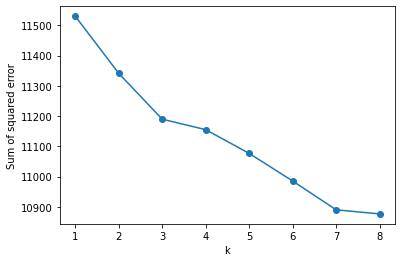

In [19]:
from sklearn.cluster import KMeans
k=list(range(1,9))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(tfidfDF)
    ssd.append(kmeans.inertia_)
    
plt.plot(k,ssd,'o-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.show()

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(tfidfDF)

KMeans(n_clusters=3)

In [ ]:
kmeans_preds=kmeans.predict(tfidfDF)
#kmeans_labels=kmeans.labels_

In [58]:
DF_Count=tfidfDF

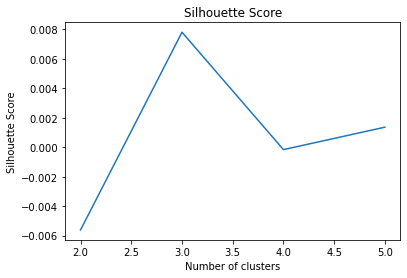

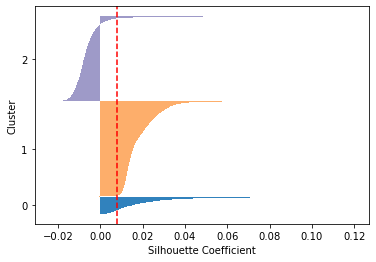

In [85]:
X = tfidfDF

# Determine the best number of clusters using Silhouette score
range_n_clusters = [2, 3, 4, 5]
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette scores
plt.plot(range_n_clusters, silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Plot Silhouette diagram for the best number of clusters
best_n_clusters = np.argmax(silhouette_scores) + 2
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)
silhouette_vals = silhouette_samples(X, cluster_labels)

y_lower, y_upper = 0, 0
yticks = []

for i, c in enumerate(np.unique(cluster_labels)):
    c_silhouette_vals = silhouette_vals[cluster_labels == c]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = plt.cm.tab20c(float(i) / best_n_clusters)
    plt.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
    yticks.append((y_lower + y_upper) / 2.)
    y_lower += len(c_silhouette_vals)

plt.axvline(x=silhouette_score(X, cluster_labels), color='red', linestyle='--')
plt.yticks(yticks, range(best_n_clusters))
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.show()

In [67]:
x=DF_Count["inflation"]  
y=DF_Count["price"]    
z=DF_Count["high"]  
colnames=DF_Count.columns

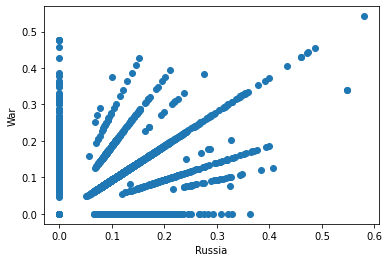

In [61]:
plt.scatter(DF_Count["russia"] , DF_Count["war"])
plt.xlabel('Russia')
plt.ylabel('War')
plt.show()

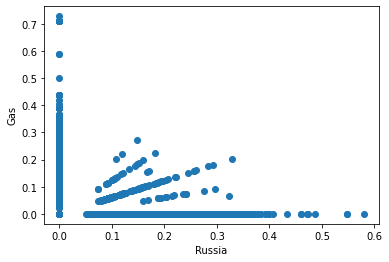

In [63]:
plt.scatter(DF_Count["russia"] , DF_Count["gas"])
plt.xlabel('Russia')
plt.ylabel('Gas')
plt.show()

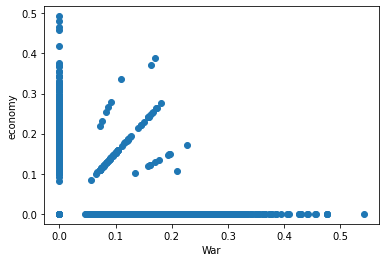

In [66]:
plt.scatter(DF_Count["war"] , DF_Count["economy"])
plt.xlabel('War')
plt.ylabel('economy')
plt.show()

/var/folders/rg/npqplhfd76xfyvddqfbtkvz40000gn/T/ipykernel_1015/2485697282.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)


NameError: name 'kmeans_preds' is not defined

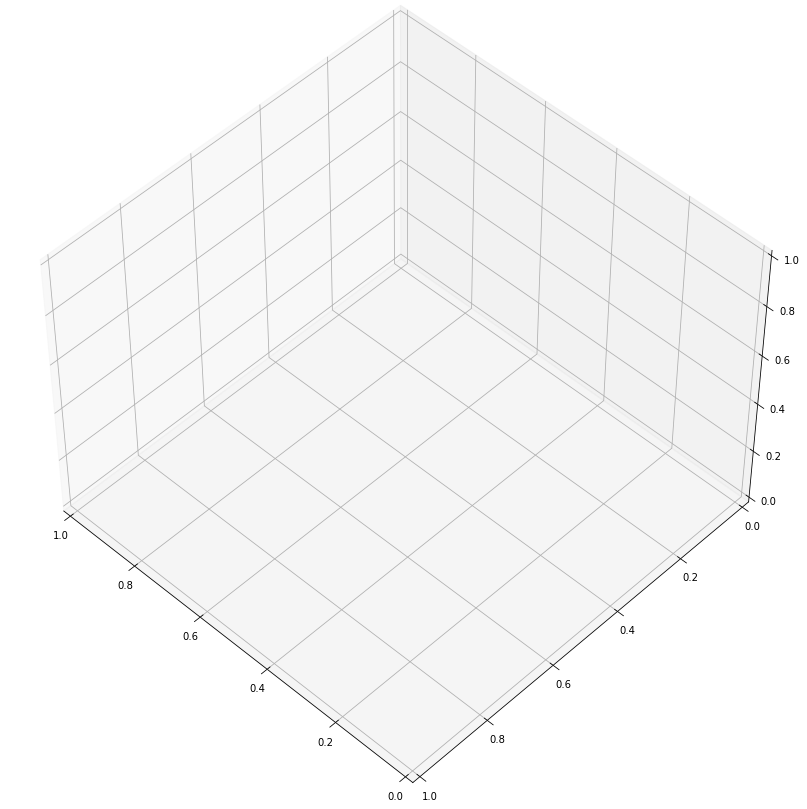

In [68]:
fig1 = plt.figure(figsize=(12, 12))
ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)

ax1.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=200,c=kmeans_preds)
ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])

ax1.set_xlabel('inflation', fontsize=25)
ax1.set_ylabel('price', fontsize=25)
ax1.set_zlabel('high', fontsize=25)
#plt.show()
        
centers = kmeans.cluster_centers_

C1=centers[0,(1,2,14)]
print(C1)
C2=centers[1,(1,2,14)]
print(C2)
xs=C1[0],C2[0]
print(xs)
ys=C1[1],C2[1]
zs=C1[2],C2[2]


ax1.scatter(xs,ys,zs, c='black', s=2000, alpha=0.2)
plt.show()

In [9]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

In [17]:
cosdist = 1 - cosine_similarity(tfidfDF.sample(100))
print(cosdist)
print(np.round(cosdist,3))  #cos dist should be .02

[[0.00000000e+00 9.80303489e-01 9.54659562e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.80303489e-01 0.00000000e+00 9.86388838e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.54659562e-01 9.86388838e-01 2.22044605e-16 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  8.78810519e-01 9.84577322e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 8.78810519e-01
  0.00000000e+00 8.72739135e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.84577322e-01
  8.72739135e-01 2.22044605e-16]]
[[0.    0.98  0.955 ... 1.    1.    1.   ]
 [0.98  0.    0.986 ... 1.    1.    1.   ]
 [0.955 0.986 0.    ... 1.    1.    1.   ]
 ...
 [1.    1.    1.    ... 0.    0.879 0.985]
 [1.    1.    1.    ... 0.879 0.    0.873]
 [1.    1.    1.    ... 0.985 0.873 0.   ]]


In [18]:
#----------------------------------------------------------
## Hierarchical Clustering using ward and cosine sim
linkage_matrix = ward(cosdist) #define the linkage_matrix 
#using ward clustering pre-computed distances
print(linkage_matrix)

[[ 67.          82.           0.           2.        ]
 [ 73.          98.           0.           2.        ]
 [  3.          51.           0.52413661   2.        ]
 [ 56.          80.           0.75789351   2.        ]
 [ 24.          42.           0.85833697   2.        ]
 [ 39.          40.           0.86275155   2.        ]
 [  4.          41.           0.98351299   2.        ]
 [ 37.          77.           0.98421834   2.        ]
 [ 15.          29.           1.01499549   2.        ]
 [ 44.          79.           1.02082293   2.        ]
 [ 62.          85.           1.04973895   2.        ]
 [  2.          55.           1.06501356   2.        ]
 [ 27.          97.           1.07046253   2.        ]
 [ 89.          96.           1.1050034    2.        ]
 [ 32.          87.           1.12309992   2.        ]
 [ 26.          47.           1.12343265   2.        ]
 [ 17.          78.           1.12633862   2.        ]
 [  7.          12.           1.13146146   2.        ]
 [ 46.    

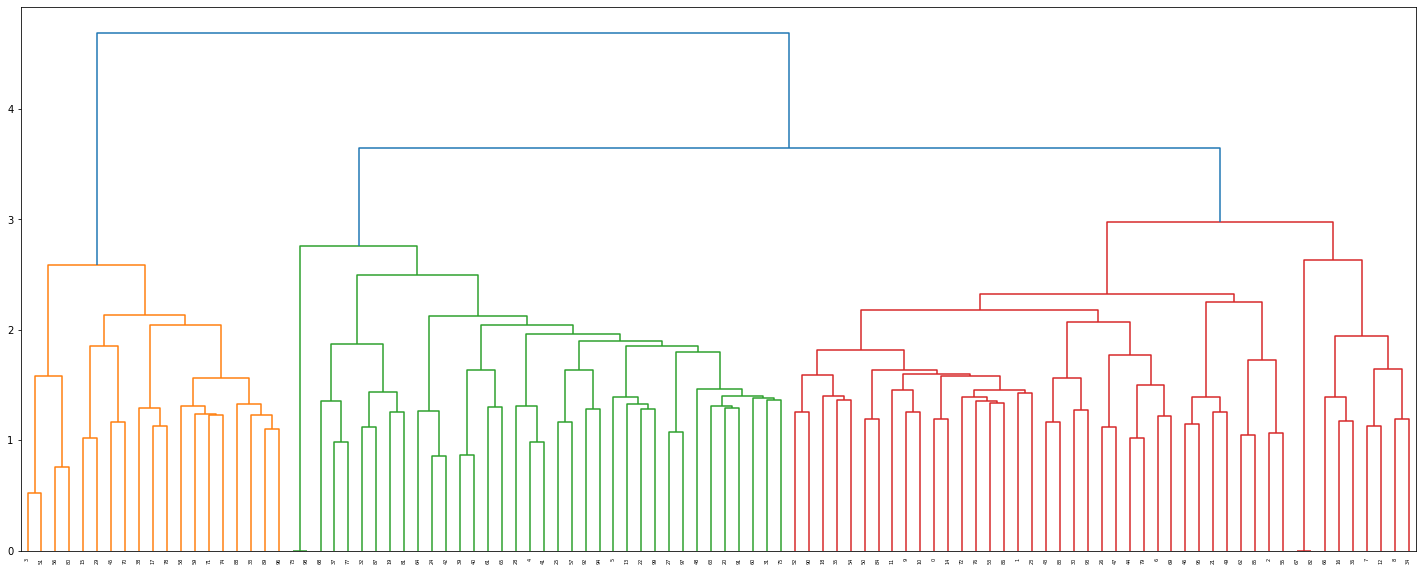

In [19]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix)
plt.show()